# Machine learning basics

In [662]:
import numpy as np
import matplotlib.pyplot as plt

In [663]:
rawData = np.array([[1.,86.,4.,820000.],[1.,37.,2.,388000.],[1.,24.,1.,310000.],[1.,27.,2.,355000.],[1.,34.,1.,395000.],[1.,36.,1.,568000.],[1.,12.,1.,148000.],[1.,50.,2.,490000.],[1.,47.,3.,549000.],[1.,45.,3.,500000.],[1.,87.,4.,950000.],[1.,52.,2.,639000.],[1.,27.,1.,379000.],[1.,37.,2.,420000.],[1.,82.,4.,850000.],[1.,50.,3.,850000.],[1.,38.,1.,438000.],[1.,52.,2.,535000.],[1.,63.,3.,605000.],[1.,70.,3.,940000.],[1.,120.,5.,1560000.],[1.,102.,5.,1149498.],[1.,66.,3.,765000.],[1.,70.,5.,936000.],[1.,45.,1.,430000.],[1.,61.,3.,850000.],[1.,110.,4.,1650000.],[1.,29.,2.,470000.],[1.,56.,3.,588000.],[1.,149.,5.,1420000.],[1.,85.,4.,897000.],[1.,60.,3.,568000.],[1.,48.,2.,595000.],[1.,61.,3.,697000.],[1.,53.,3.,780000.]])
Data = np.copy(rawData)
X = np.mat(Data[:,0:3])
y = np.mat(Data[:,3]).transpose()



## Normalisation des données

In [664]:
for dim in range(1,X.shape[1]):
    X[:,dim] =(X[:,dim]-X[:,dim].mean())/X[:,dim].ptp() 


## Séparation en sets d'entrainement et de test

In [665]:
trainingSetSize = int(rawData.shape[0] / 1.3)
X_train = np.mat(X[:trainingSetSize,:])
y_train = np.mat(y[:trainingSetSize,:])
X_test = np.mat(X[trainingSetSize:,:])
y_test = np.mat(y[trainingSetSize:,:])

### Graphique montrant le prix d'un appartement par rapport au cout et au nombre de pièces

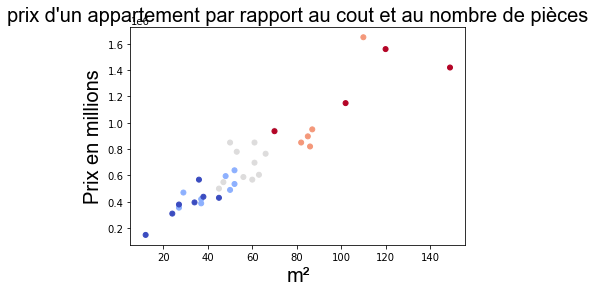

In [690]:
font = {'family': 'arial',
        'weight': 'normal',
        'size': 20,}
scaled_pieces = (Data[:,2] - min(Data[:,2]))/ Data[:,2].ptp()
colors = plt.cm.coolwarm(scaled_pieces)
plt.title("prix d'un appartement par rapport au cout et au nombre de pièces", fontdict=font)
plt.ylabel('Prix en millions', fontdict=font)
plt.xlabel('m²', fontdict=font)
plt.scatter(rawData[:,1],rawData[:,3],s=100,marker='.', color=colors);

## Calcul litéral du vecteur de régression linéaire

In [667]:
O =(X_train.transpose() * X_train).I * X_train.transpose() * y_train
O

matrix([[ 697623.49704996],
        [1382550.30053466],
        [ 114308.48768837]])

#### Prédiction du prix du premier appartement grâce à notre vecteur

In [668]:
print("Prix prédit : ",(X_test[2] * O).item(0))
print("Prix réel : ",(y_test[2]).item(0))


Prix prédit :  672967.0857821003
Prix réel :  588000.0


## Droite de régression linéaire du modèle

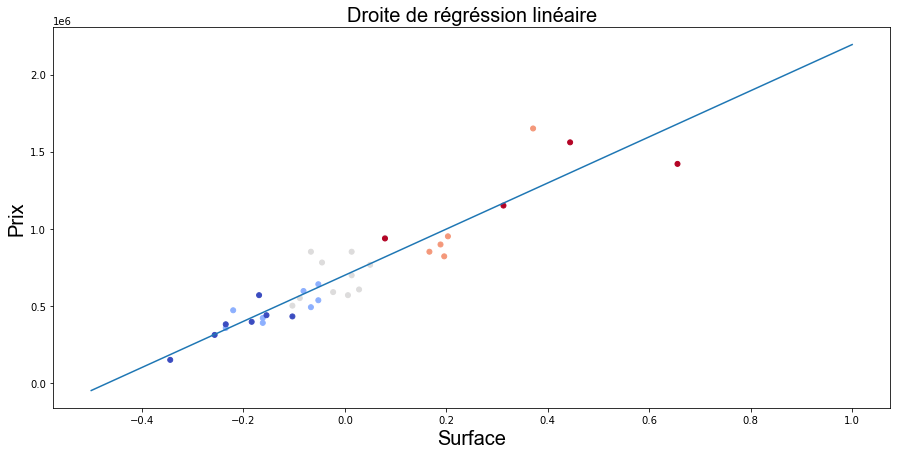

In [669]:
scaled_pieces = (Data[:,2] - min(Data[:,2]))/ Data[:,2].ptp()
colors = plt.cm.coolwarm(scaled_pieces)
plt.figure(figsize=(15,7))
plt.title("Droite de régréssion linéaire", fontdict=font)
plt.ylabel('Prix', fontdict=font)
plt.xlabel('Surface', fontdict=font)
plt.scatter(Data[:,1],Data[:,3],s=100,marker='.', color=colors)
x = np.linspace(-0.5,1 , 1000)
plt.plot(x,O.item(0) + sum([O.item(el) * x for el in range(1,O.shape[0])]))
plt.show()

## Analyse de la précision du modèle sur la base de test

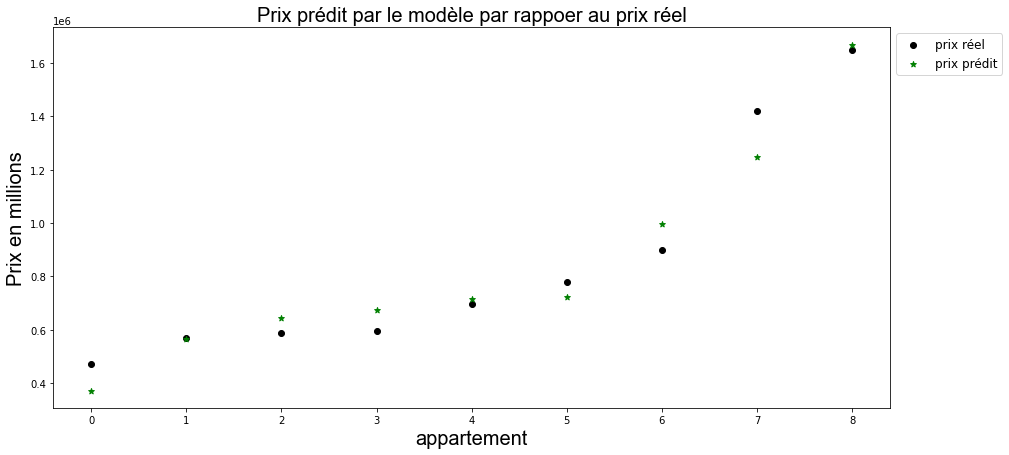

In [670]:
P = X_test * O
results = np.concatenate((y_test,P), axis=1)
results.sort(axis=0)
plt.figure(figsize=(15,7))
plt.title("Prix prédit par le modèle par rappoer au prix réel", fontdict=font)
plt.scatter(range(results.shape[0]),np.asarray(results[:,0]), label ='prix réel', color = 'black')
plt.scatter(range(results.shape[0]),np.asarray(results[:,1]), label ='prix prédit',marker='*', color = 'green')
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', borderaxespad=0.5, fontsize = 'large')
plt.ylabel('Prix en millions', fontdict=font)
plt.xlabel('appartement', fontdict=font)
plt.show()

# Descente de gradient

## La fonction de cout à minimiser est la suivante:
### 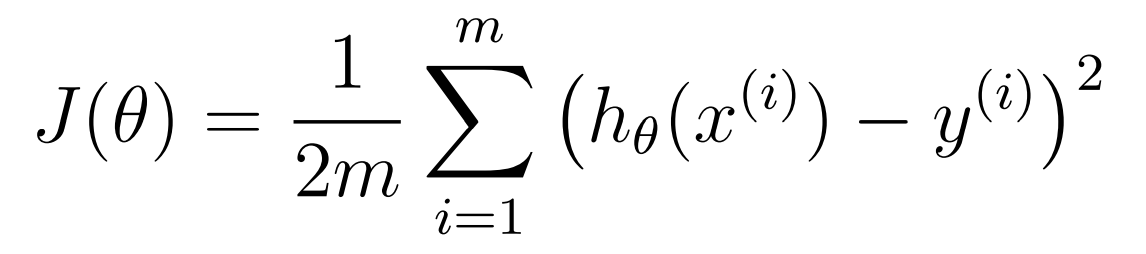

## θj := θj - α (d/dθ) J(θ)

Dérvivée de J(θ) 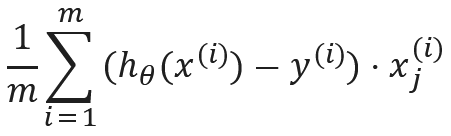 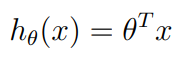
(pour X avec plusieurs éxemples)    h(θ)X = X * θ  
X matrice n * m (n nombre d'exemples et m nombre de features)
θ matrice m * 1 

In [671]:
def GradientDescentNextTheta(theta, alpha, X, y):
    m = X.shape[1]
    return theta -  (alpha/m) * X.transpose() * (X * theta - y)

def computeJ(theta, X, y):
    m = X.shape[1]
    return (1/2*m) * (X * theta - y).transpose()*(X * theta - y)

In [672]:
thetaTest = np.mat(np.ones(X_train.shape[1])).transpose()
thetaMatrix = [thetaTest]
J_array = [computeJ(thetaMatrix[0], X_train, y_train).item()]
iteration = 0
alpha = 0.05
while iteration < 2000:
    thetaMatrix.append(GradientDescentNextTheta(thetaMatrix[iteration], alpha, X_train, y_train))
    J_array.append((computeJ(thetaMatrix[iteration + 1], X_train, y_train)).item())
    iteration += 1
    

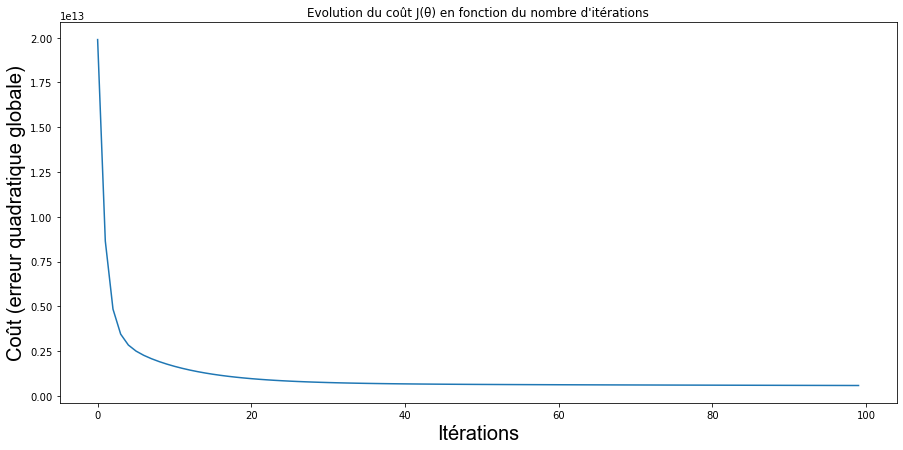

In [729]:
plt.figure(figsize=(15,7))
plt.title("Evolution du coût J(θ) en fonction du nombre d'itérations")
plt.ylabel('Coût (erreur quadratique globale)', fontdict=font)
plt.xlabel('Itérations', fontdict=font)
plt.plot(J_array[:100]);
#plt.xscale('log')

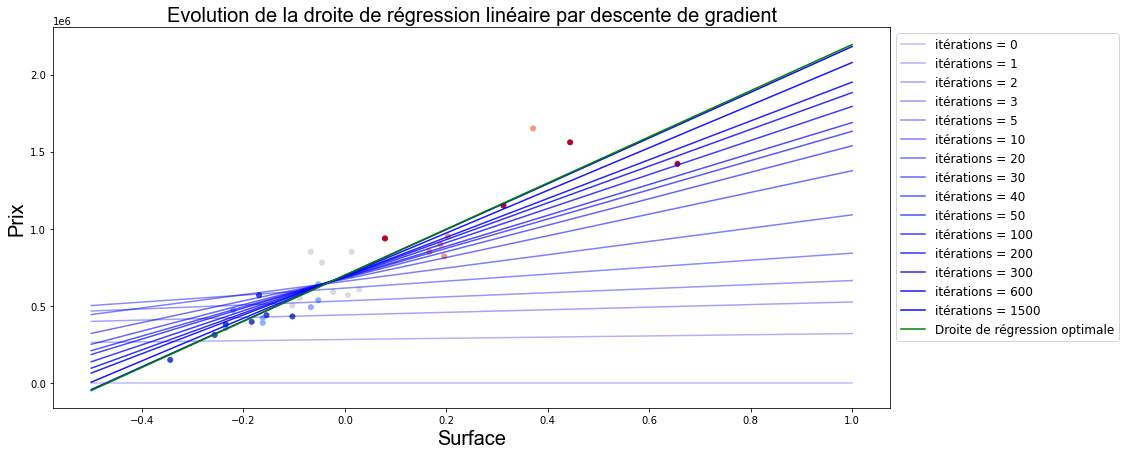

In [698]:
scaled_pieces = (Data[:,2] - min(Data[:,2]))/ Data[:,2].ptp()
colors = plt.cm.coolwarm(scaled_pieces)
plt.figure(figsize=(15,7))
plt.title("Evolution de la droite de régression linéaire par descente de gradient", fontdict=font)
plt.ylabel('Prix', fontdict=font)
plt.xlabel('Surface', fontdict=font)
plt.scatter(Data[:,1],Data[:,3],s=100,marker='.', color=colors)
x = np.linspace(-0.5,1 , 1000)

selectedThetas = [0, 1 , 2 , 3, 5, 10 , 20 , 30, 40 , 50 ,100, 200, 300, 600, 1500]
for value in selectedThetas:
    plt.plot(x,thetaMatrix[value].item(0) + sum([thetaMatrix[value].item(el) * x for el in range(1,thetaMatrix[0].shape[0])]),alpha= (selectedThetas.index(value)-len(selectedThetas))/(len(selectedThetas)+5),label ='itérations = ' + str(value), color = 'blue')
plt.plot(x,O.item(0) + sum([O.item(el) * x for el in range(1,O.shape[0])]), color='green',label='Droite de régression optimale')
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', borderaxespad=0.5, fontsize = 'large')
plt.show()

In [723]:
x1 = np.linspace(900000.0, 1900000.0, 100)
x2 = np.linspace(-50000.0, 250000.0, 100)

In [724]:
X1, X2 = np.meshgrid(x1, x2)
Y = computeJ([[816149.76666667],[X1],[X2]], X, y).item()

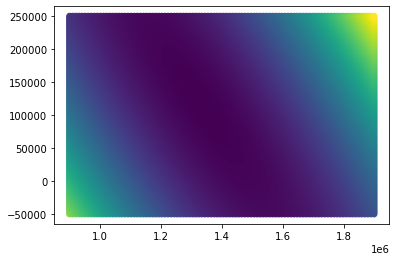

In [725]:
cm = plt.cm.get_cmap('viridis')

plt.scatter(X1, X2, c=Y, cmap=cm)
plt.show()

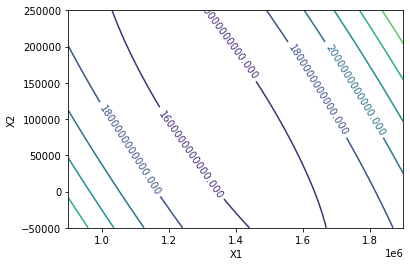

In [726]:
cp = plt.contour(X1, X2, Y)

plt.clabel(cp, inline=1, fontsize=10)
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()